# Ajuste de la cantidad de parámetros de un modelo

Ya sabemos que es

¿Cuando se da el overfitting?

La cantidad de parámetros comparable con la cantidad de observaciones

Estrategia natural: Reducir la cantidad de parámetros

In [1]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [2]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

Using TensorFlow backend.


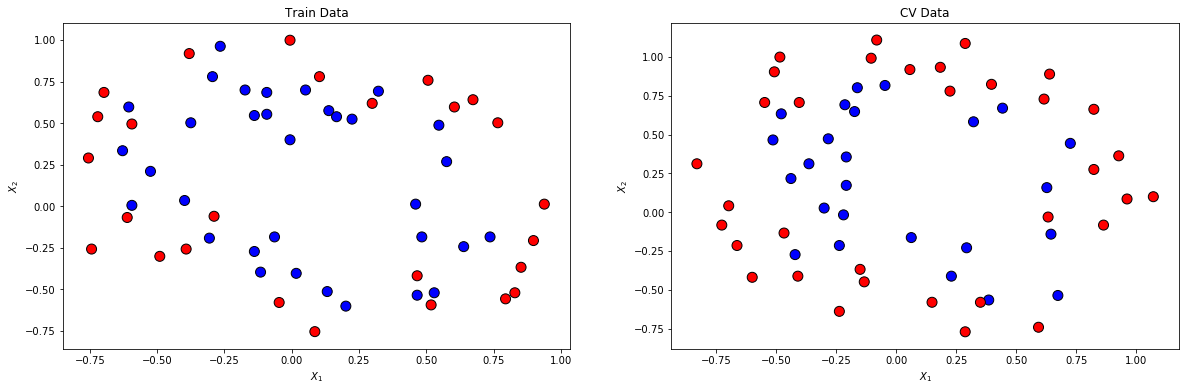

In [3]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

# Regresión logística - Underfitting - High Bias

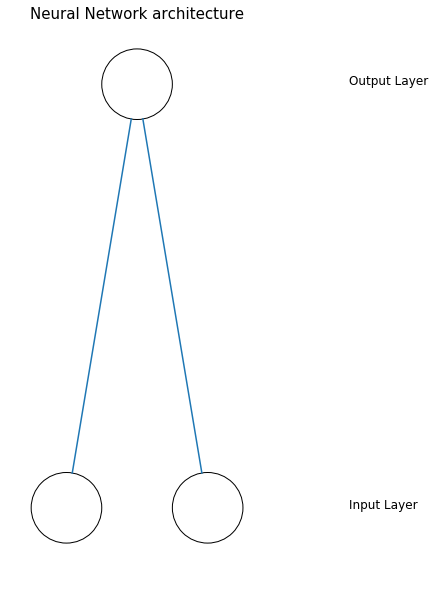

In [4]:
network = draw_nn.DrawNN( [2, 1] )
network.draw()

\begin{equation}
\large
a = x_1w_1 + x_2w_2+w_0
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


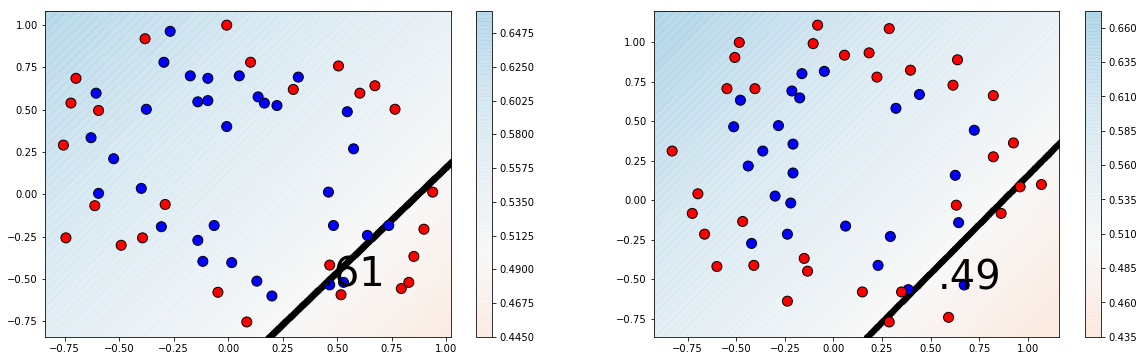

In [21]:
degree = 1
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

# Regresión logística polinomial - Overfitting - High Variance

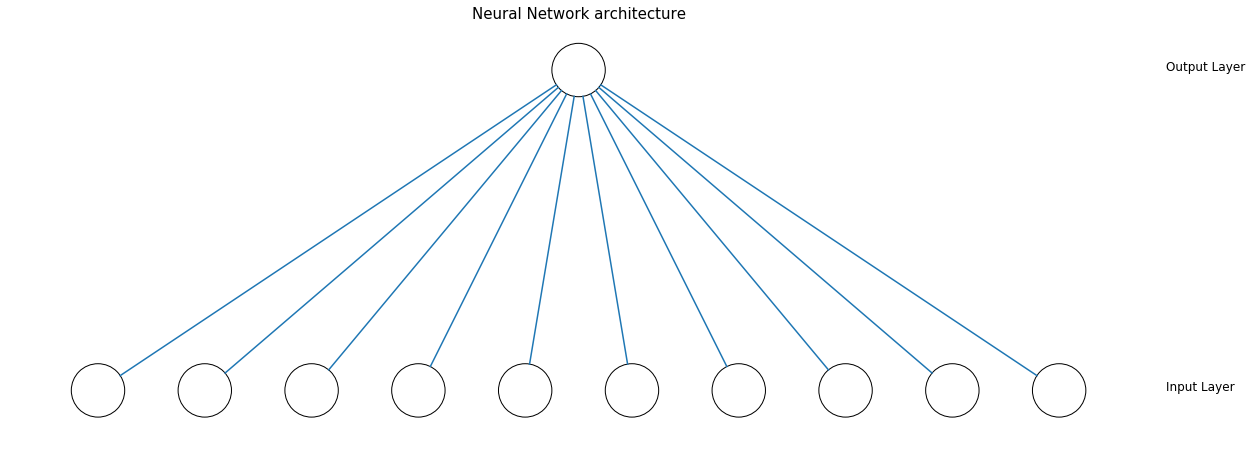

In [161]:
network = draw_nn.DrawNN( [10, 1] )
network.draw()

\begin{equation}
\large
a = w_0 + x_1w_1 + x_2w_2 + x_1x_2w_3 + w_4x_1^2 + w_5x_2^2 + ... + w_Nx_1^K
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

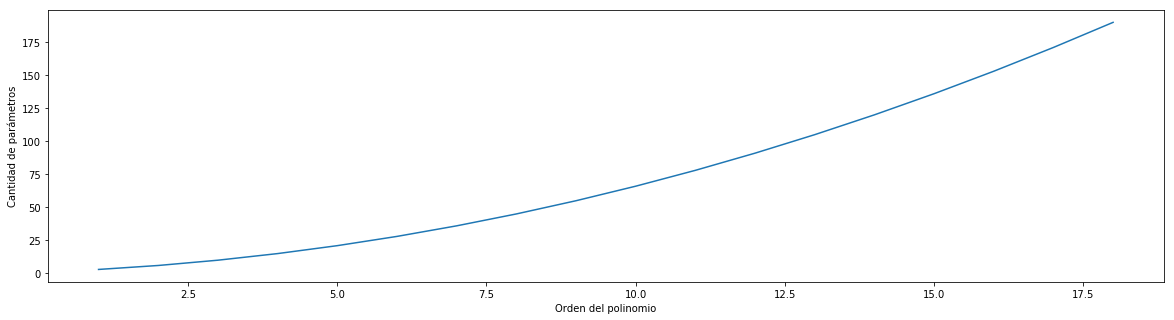

In [162]:
plt.figure(figsize=(20,5))
N = 18
pol_orders = np.linspace(1, N, N)
plt.plot(pol_orders, list(map(RHelper.params_vs_pol_order, pol_orders)))
plt.xlabel('Orden del polinomio')
plt.ylabel('Cantidad de parámetros')
plt.show()

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


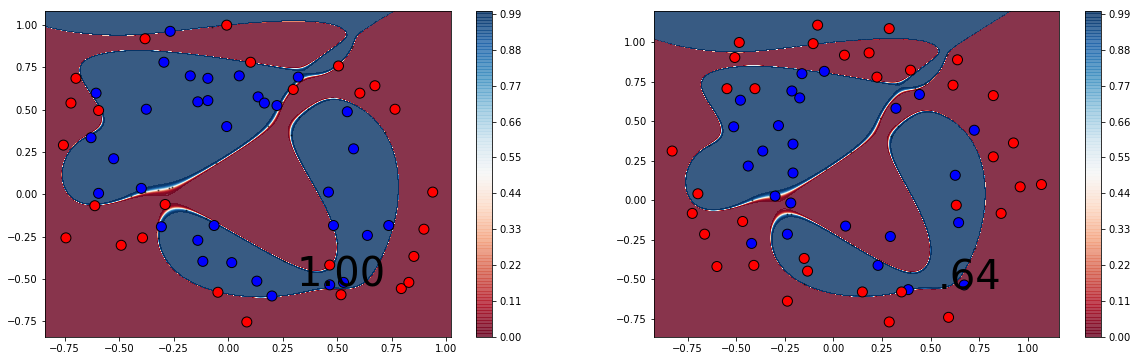

In [163]:
degree = 18
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Aclaración: El overfitting se dá debido a la cantidad de parámetros, no debido a la cantidad de entradas (aumentar la cantidad de entradas hace que aumente la cantidad de parámetros)

Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


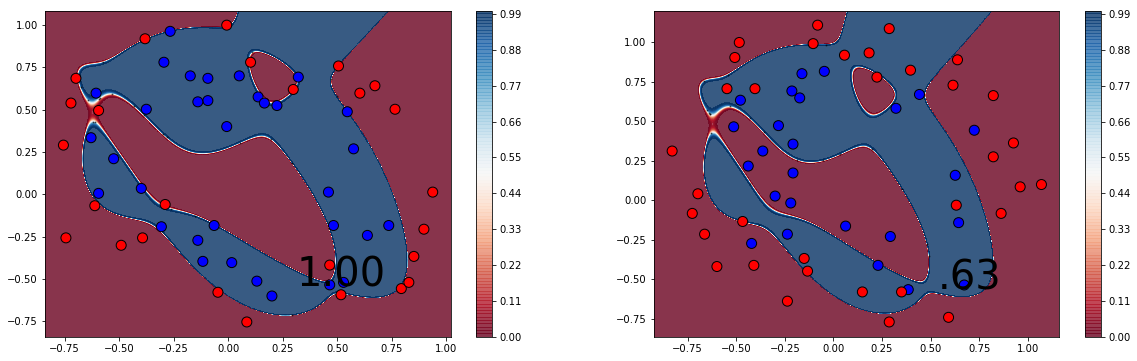

In [164]:
degree = 6
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

# Encontrar el orden de polinomio óptimo. Ni overfitting ni underfitting (Just Right)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


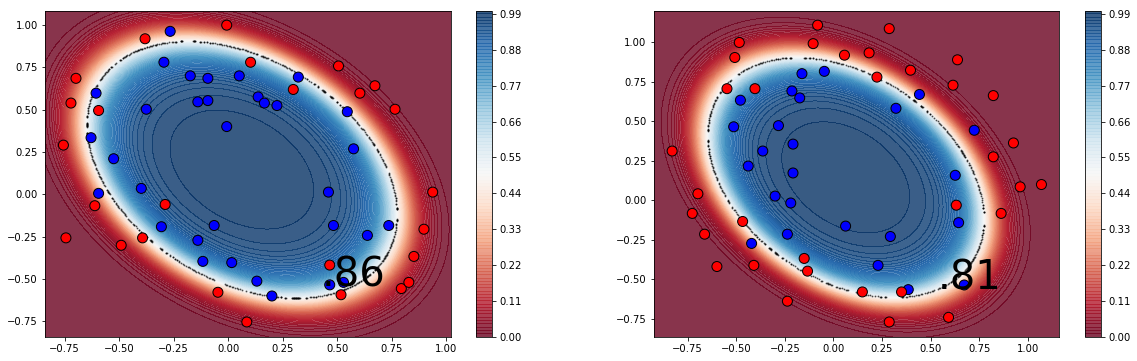

In [165]:
degree = 2
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

# Cual es el optimo?

In [166]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

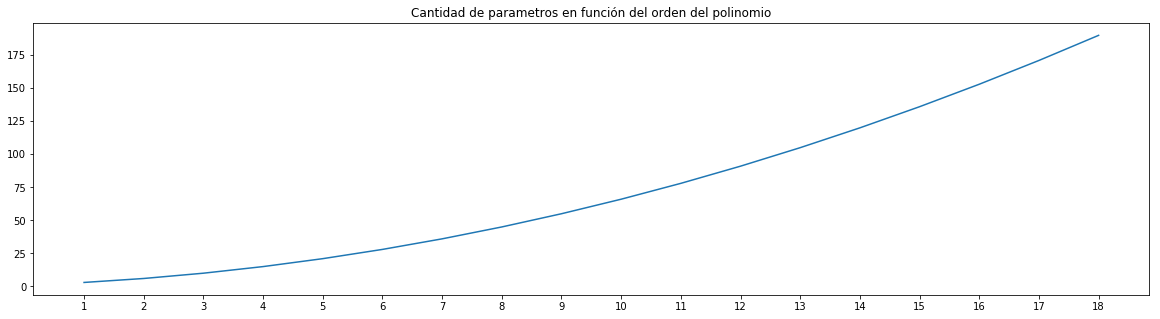

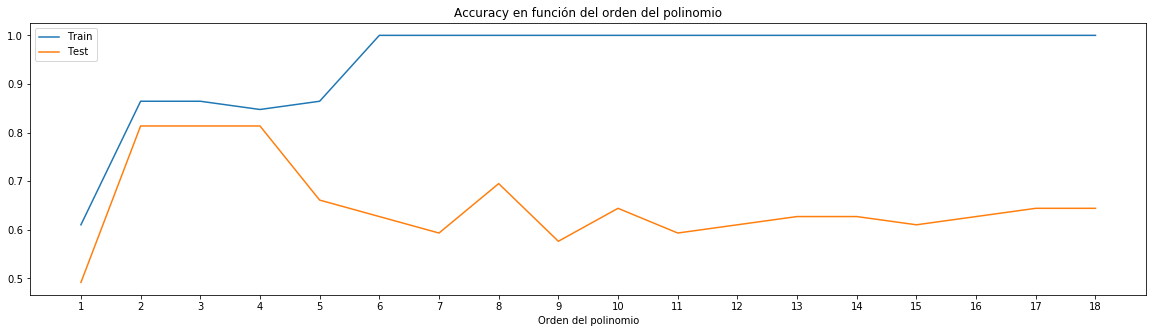

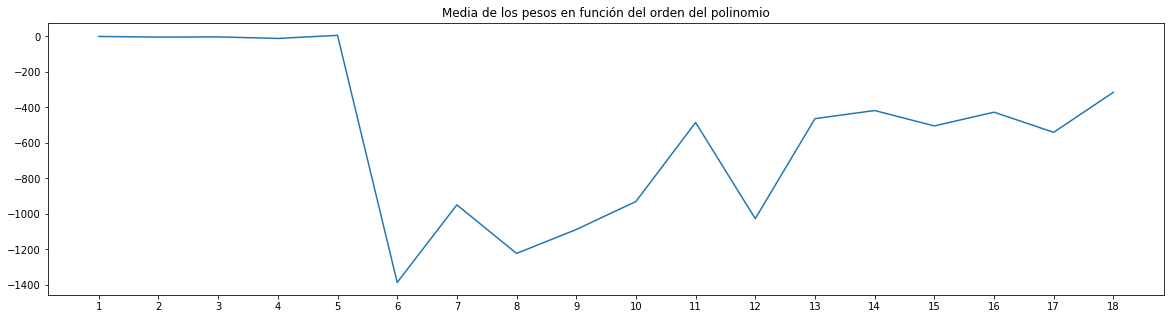

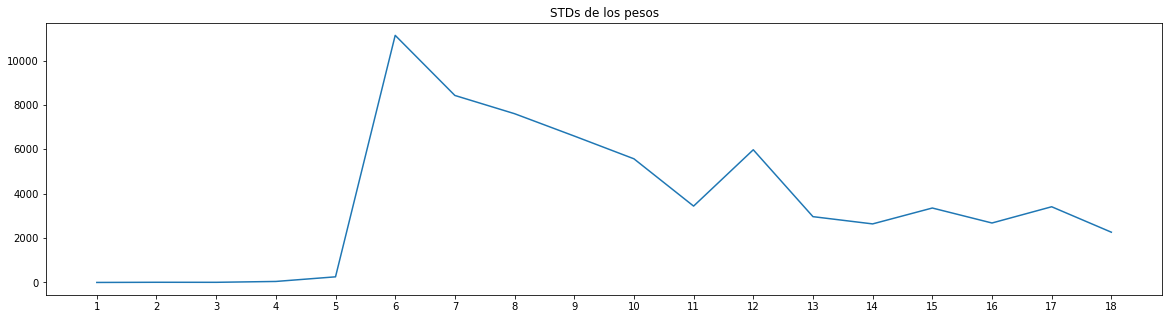

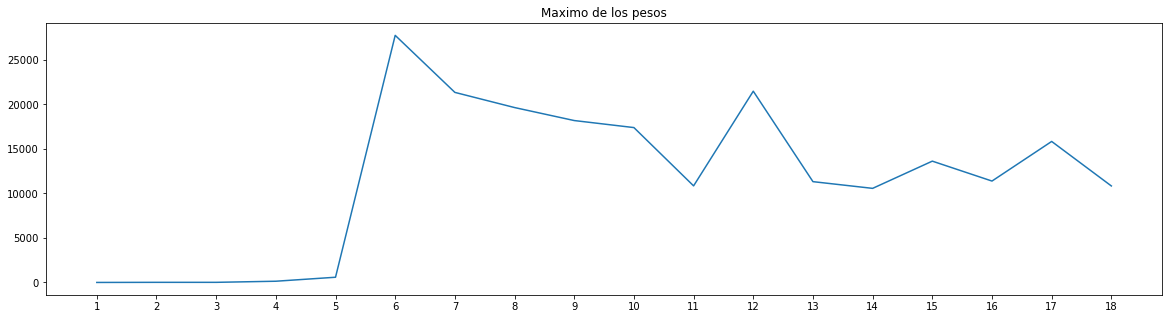

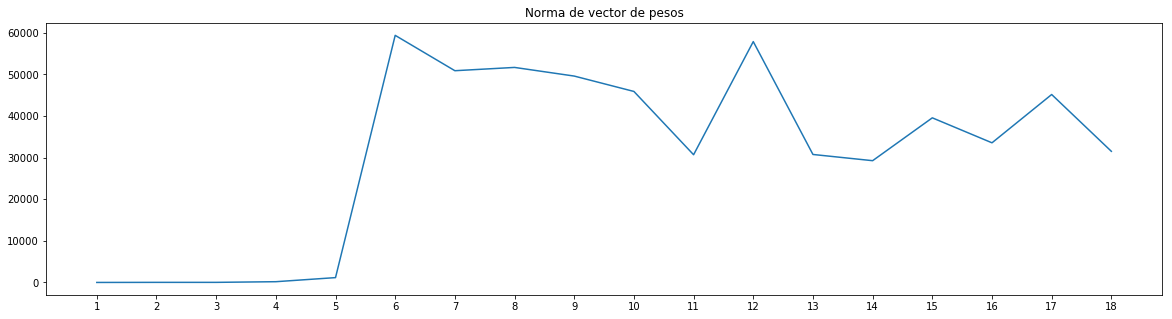

In [167]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, coefs_num)
ax.set_title("Cantidad de parametros en función del orden del polinomio")
ax.set_xticks(degrees_0)
plt.show()
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, train_acc_array_0, label="Train")
ax.plot(degrees_0, test_acc_array_0, label="Test")
ax.set_title("Accuracy en función del orden del polinomio")
ax.set_xlabel('Orden del polinomio')
ax.set_xticks(degrees_0)
ax.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_array_mean_0)
plt.title("Media de los pesos en función del orden del polinomio")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_array_std_0)
plt.title("STDs de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_abs_max_0)
plt.title("Maximo de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_norm)
plt.title("Norma de vector de pesos")
plt.xticks(degrees_0)
plt.show()

Preguntas:
- Cual es la cantidad de parámetros óptima?
- Que pasa con los pesos?